In [83]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

In [84]:
imName  = 'imagem.png'  #input('Nome do Arquivo:')
im      = Image.open(imName)
imArray = np.array(im)

y = 0
x = 255

ksize = 3
kernel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]).astype('float').T # Sobel
# Filtro detector de borda
kernel= np.array(
     [
        [ 0, -4,  0],
        [-4, 8, -4],
        [ 0, -4,  0]
    ]
).astype('float').T
display(kernel,kernel1)

array([[ 0., -4.,  0.],
       [-4.,  8., -4.],
       [ 0., -4.,  0.]])

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]])

In [85]:
# Obter Região
region = imArray[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]

In [86]:
# Saída Para cada Píxel
im_out = np.zeros((imArray.shape))
for y in range(ksize//2, imArray.shape[0]-ksize//2):
    for x in range(ksize//2, imArray.shape[1]-ksize//2):
        region = imArray[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
        for i in range(ksize):
            for j in range(ksize):
                im_out[y,x] += region[i,j]*kernel[i,j]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


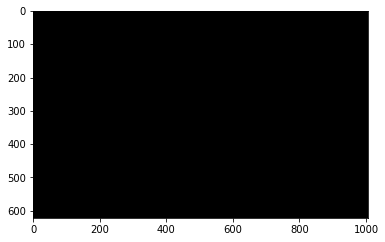

In [87]:
# Usando indexação do numpy
im_out = np.zeros((imArray.shape))
for y in range(ksize//2, imArray.shape[0]-ksize//2):
    for x in range(ksize//2, imArray.shape[1]-ksize//2):
        im_out[y,x] = (imArray[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]*kernel).sum()

plt.figure()
plt.imshow(im_out)
plt.show()